In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.fftpack import dct, idct
import random

In [2]:
# 1️⃣ Buka gambar dan ubah ke grayscale
img = Image.open("img/png.png").convert("L")

# 2️⃣ Ubah jadi array numpy
data = np.array(img)

# 3️⃣ Pilih baris piksel (0 berarti paling atas)
row_index = 100
row_data = data[row_index, :]

# 4️⃣ Buat strip horizontal tipis (biar keliatan visualnya)
strip_height = 5
strip = np.tile(row_data, (strip_height, 1))

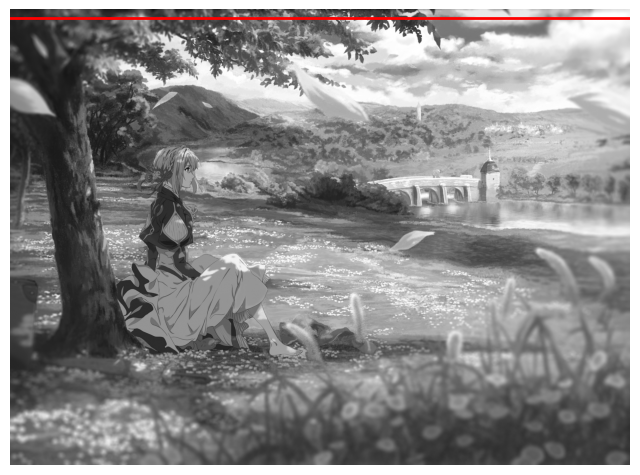

In [3]:
# ==============================================================
# GAMBAR 1: Gambar asli dengan garis merah di baris yang diambil
# ==============================================================
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='gray')
plt.axhline(y=row_index, color='red', linewidth=2)
plt.axis('off')
plt.show()

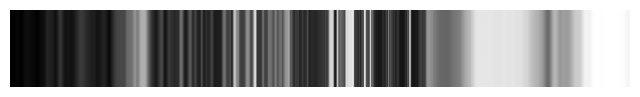

In [4]:
# ==============================================================
# GAMBAR 2: Visualisasi baris piksel sebagai strip horizontal
# ==============================================================
plt.figure(figsize=(8, 1))
plt.imshow(strip, cmap='gray', aspect='auto')
plt.axis('off')
plt.show()

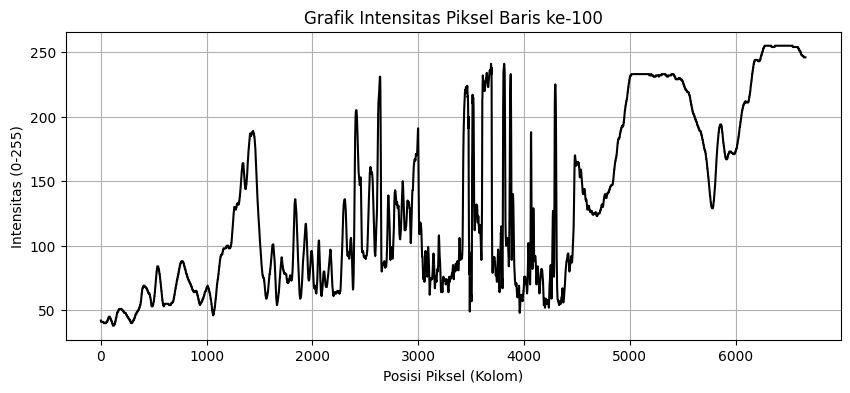

In [5]:
# ==============================================================
# GAMBAR 3: Grafik intensitas piksel 0–255
# ==============================================================
plt.figure(figsize=(10, 4))
plt.plot(row_data, color='black')
plt.title(f"Grafik Intensitas Piksel Baris ke-{row_index}")
plt.xlabel("Posisi Piksel (Kolom)")
plt.ylabel("Intensitas (0-255)")
plt.grid(True)
plt.show()

In [6]:
# # 1. Buka file PNG

# nameIMG = "Cb"

# img = Image.open(f"img/{nameIMG}.png").convert("RGB")


# img.save(f"img/{nameIMG}_100.jpg", "JPEG", quality=100)  # quality: 1–95

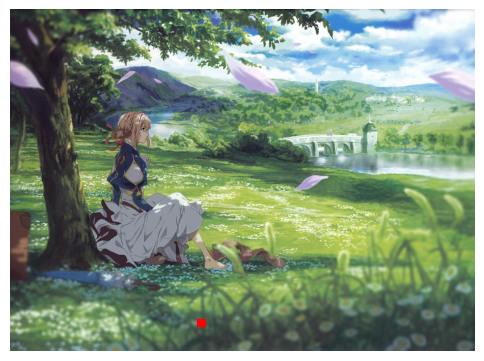

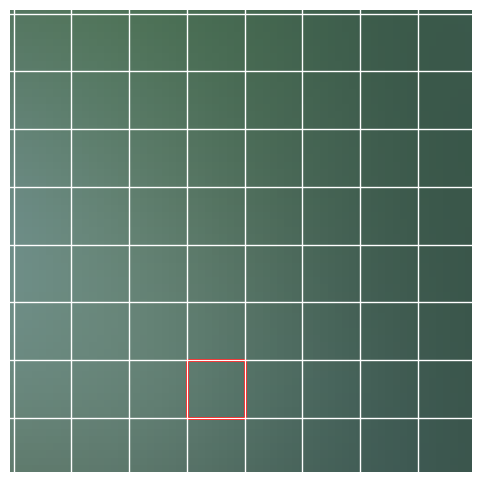

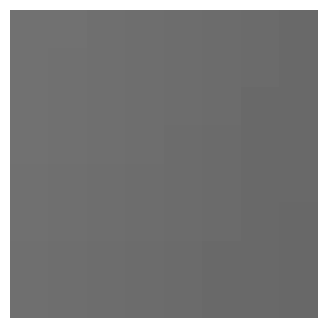

Matriks kecerahan 8x8 (Y):
[[114 113 111 110 109 108 107 106]
 [113 112 111 110 109 108 107 105]
 [113 112 111 110 109 108 106 105]
 [113 112 111 110 108 107 106 105]
 [112 111 110 109 108 107 106 105]
 [112 111 110 109 108 107 106 104]
 [111 110 109 108 107 106 105 104]
 [111 110 109 108 107 106 105 104]]


In [14]:
# === 1. Buka gambar ===
img = Image.open("img/png.png")
w, h = img.size

# === 2. Tentukan ukuran crop dan blok ===
crop_size = 64
block_size = 8  # grid 8x8

# === 3. Pilih posisi acak crop di gambar asli ===
x0 = random.randint(0, w - crop_size)
y0 = random.randint(0, h - crop_size)
x1 = x0 + crop_size
y1 = y0 + crop_size

# === 4. Crop gambar ===
crop = img.crop((x0, y0, x1, y1))

# === 5. Konversi ke YCbCr dan ambil channel Y ===
Y = np.array(crop.convert("YCbCr"))[:, :, 0]

# === 6. Pilih satu blok 8x8 dari grid acak ===
grid_x = random.randint(0, crop_size // block_size - 1)
grid_y = random.randint(0, crop_size // block_size - 1)
bx0 = grid_x * block_size
by0 = grid_y * block_size
bx1 = bx0 + block_size
by1 = by0 + block_size
Y_block = Y[by0:by1, bx0:bx1]

# === 7a. Gambar asli + kotak crop ===
plt.figure(figsize=(6,6))
plt.imshow(img)
rect_crop = plt.Rectangle((x0, y0), crop_size, crop_size,
                          edgecolor='r', facecolor='none', lw=3)
plt.gca().add_patch(rect_crop)
plt.axis("off")
plt.show()

# === 7b. Crop + grid 8x8 + blok terpilih ===
plt.figure(figsize=(6,6))
plt.imshow(crop)
# Tambahkan grid
for i in range(0, crop_size, block_size):
    plt.axhline(i, color='white', lw=1)
    plt.axvline(i, color='white', lw=1)
# Kotak blok terpilih
rect_block = plt.Rectangle((bx0, by0), block_size, block_size,
                           edgecolor='r', facecolor='none', lw=2)
plt.gca().add_patch(rect_block)
plt.axis("off")
plt.show()

# === 7c. Channel Y blok 8x8 ===
plt.figure(figsize=(4,4))
plt.imshow(Y_block, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

# === 8. Cetak matriks kecerahan 8x8 ===
np.set_printoptions(precision=1, suppress=True)
print("Matriks kecerahan 8x8 (Y):")
print(Y_block)
